In [ ]:
import pandas_datareader.data as web
import datetime
%matplotlib inline

#### Data

In [13]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 1, 1)

SP500 = web.DataReader(['sp500'], 'fred', start, end)
SP500.columns = ['Close']
SP500.dropna(inplace = True)
SP500

,Close
DATE,
2010-09-13,1121.90
2010-09-14,1121.10
2010-09-15,1125.07
2010-09-16,1124.66
2010-09-17,1125.59
...,...
2020-09-03,3455.06
2020-09-04,3426.96
2020-09-08,3331.84


#### Inputs calculation

In [14]:
SP500['% change'] = SP500['Close'].pct_change()
SP500['50 sma'] = SP500['Close'].rolling(window=50).mean().round(5)
SP500['200 sma'] = SP500['Close'].rolling(window=200).mean().round(5)
SP500.dropna(inplace=True)
SP500

,Close,% change,50 sma,200 sma
DATE,,,,
2011-06-27,1280.10,0.009184,1317.3514,1264.32450
2011-06-28,1296.67,0.012944,1316.8912,1265.19835
2011-06-29,1307.41,0.008283,1316.9366,1266.12990
2011-06-30,1320.64,0.010119,1317.0970,1267.10775
2011-07-01,1339.67,0.014410,1317.2832,1268.18280
...,...,...,...,...
2020-09-03,3455.06,-0.035126,3292.0484,3091.19635
2020-09-04,3426.96,-0.008133,3298.9124,3092.73025
2020-09-08,3331.84,-0.027756,3305.3682,3093.84715


#### Conditions

In [15]:
SP500['Condition 1'] = SP500['Close'] >= SP500['200 sma']
SP500['Condition 2'] = (SP500['50 sma'] >= SP500['200 sma']) | SP500['Condition 1'] == True
SP500

,Close,% change,50 sma,200 sma,Condition 1,Condition 2
DATE,,,,,,
2011-06-27,1280.10,0.009184,1317.3514,1264.32450,True,True
2011-06-28,1296.67,0.012944,1316.8912,1265.19835,True,True
2011-06-29,1307.41,0.008283,1316.9366,1266.12990,True,True
2011-06-30,1320.64,0.010119,1317.0970,1267.10775,True,True
2011-07-01,1339.67,0.014410,1317.2832,1268.18280,True,True
...,...,...,...,...,...,...
2020-09-03,3455.06,-0.035126,3292.0484,3091.19635,True,True
2020-09-04,3426.96,-0.008133,3298.9124,3092.73025,True,True
2020-09-08,3331.84,-0.027756,3305.3682,3093.84715,True,True


#### Models

In [16]:
SP500['Buy and hold'] = 100*(1+SP500['% change']).cumprod()
SP500['200 sma model'] = 100*(1+SP500['Condition 1'].shift(1)*SP500['% change']).cumprod()
SP500['200 sma + crossover model'] = 100*(1+SP500['Condition 2'].shift(1)*SP500['% change']).cumprod()
SP500.dropna(inplace = True)
SP500

,Close,% change,50 sma,200 sma,Condition 1,Condition 2,Buy and hold,200 sma model,200 sma + crossover model
DATE,,,,,,,,,
2011-06-28,1296.67,0.012944,1316.8912,1265.19835,True,True,102.224763,101.294,101.294
2011-06-29,1307.41,0.008283,1316.9366,1266.12990,True,True,103.071465,102.133,102.133
2011-06-30,1320.64,0.010119,1317.0970,1267.10775,True,True,104.114470,103.167,103.167
2011-07-01,1339.67,0.014410,1317.2832,1268.18280,True,True,105.614727,104.654,104.654
2011-07-05,1337.88,-0.001336,1317.2932,1269.24425,True,True,105.473610,104.514,104.514
...,...,...,...,...,...,...,...,...,...
2020-09-03,3455.06,-0.035126,3292.0484,3091.19635,True,True,272.384406,160.382,161.081
2020-09-04,3426.96,-0.008133,3298.9124,3092.73025,True,True,270.169104,159.078,159.771
2020-09-08,3331.84,-0.027756,3305.3682,3093.84715,True,True,262.670188,154.662,155.336


#### Returns

In [28]:
years = len(SP500)/252

#buy and hold
start_sp = SP500['Close'].iloc[0]
end_sp = SP500['Close'].iloc[-1]
sp_average_return = (end_sp/start_sp)**(1/years)-1
print('Buy and hold model yields an average annual return of', round(sp_average_return*100, 2), '%')

#200 sma model
start_model1 = SP500['200 sma model'].iloc[0]
end_model1 = SP500['200 sma model'].iloc[-1]
model1_average_return = (end_model1/start_model1)**(1/years)-1
print('200 sma model yields an average annual return of', round(model1_average_return*100, 2), '%')

#200 sma + crossover model
start_model2 = SP500['200 sma + crossover model'].iloc[0]
end_model2 = SP500['200 sma + crossover model'].iloc[-1]
model2_average_return = (end_model2/start_model2)**(1/years)-1
print('200 sma + crossover model yields an average annual return of', round(model2_average_return*100, 2), '%')

Buy and hold model yields an average annual return of 10.84 %
200 sma model yields an average annual return of 4.74 %
200 sma + crossover model yields an average annual return of 4.79 %


#### Plots

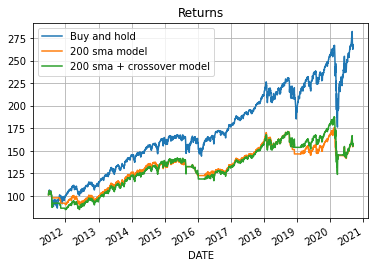

In [29]:
SP500[['Buy and hold', '200 sma model', '200 sma + crossover model']].plot(grid = True, kind = 'line', title = 'Returns')